# Rural Hospitals are in trouble and Payer Mix is at least partially to blame:

Since 2005, a rural hospital closes in America every 30 days on average  according to UNC’s SHEPS center program on Rural Hospital Closures. This trend is only accelerating. In 2020 according to Becker’s  the rate of closure was every 18 days.  This means more and more Americans, a fifth of which live in rural America, have to go farther to receive inpatient hospital-level care. In addition, in many communities’ hospitals are not only a source of health but also a major employer. The question of why these hospitals close is a complex issue but payor mix is a major factor. 

# What is Payer Mix?:

Payor mix refers to a health systems distribution of third-party payer types.  Typically, private insurance pays the most per episode, followed by Medicare, Medicaid, and lastly Self-Pay. Self-Pay is the industry term for patients without any insurance. Unlike any other business in America, hospitals must treat and stabilize those who cannot pay. This is for good reason. Under EMTALA rules patients must be seen in the ER and treated for their acute conditions. The American College of Emergency Physicians describes this as an “unfunded mandate” .

Imagine instead of a hospital one was talking about a coffee shop that had to serve coffee to whoever came in. Instead of one price for a cup each customer received a different price depending on the plan they were a member of. The Private  plan members paid \\$2 a cup. The Medicare members paid \$1.2 a cup and the Medicaid members paid 90 cents a cup. Finally, there were folks who were not members of any plan aka Self-Pay members. They could pay 50 cents today but still needed to get coffee today. If coffee costs a business a \\$1 per cup one can quickly see how the “mix” of these different types will cause  the coffee shop to remain open or will cause it close.

# How to use this tool:

On your right you can set the different frequency of payer types from 1-10. What matters is not the number itself but the ratio in relation to other payers. If you set all four payer types to 5 there is a 25% chance of a payer of any type walking through the door of your coffee shop. But if you set all values at 1 except Private which you set to 10 then there is a 10/13 chance that a private payer walks through the door. This simulation samples 1,000 customers.

In [98]:
from random import choices
import pandas 

import matplotlib as plt

In [99]:

cost_of_coffee=1.3
Self_Pay=[0,10]
Medicaid=[0,10]
Medicare=[0,10]
Private=[0,10]


#weights = [.5,1,2,3]




#matplotlib.style.use('fivethirtyeight') 






In [100]:
s=Self_Pay
m=Medicaid
care=Medicare
p=Private

weights = [s,m,care,p]

#weights=[1,1,1,1]
population = [.5,.9,1.2,2]

def determine_payer(x):
    if x==.5:
        return "Self_Pay"
    elif x==.9:
        return "Medicaid"
    elif x==1.2:
        return "Medicare"
    else:
        return "Private"
    
def subtract_cost(x):
    return float(x)-cost_of_coffee


def margin(x):
    return float((float(x)-cost_of_coffee)/cost_of_coffee)*100


i=0
payment_list=[]
payer_mix_list=[]
while i<1000:
    ch=choices(population, weights)
    mx=determine_payer(ch[0])
    payment_list.append(ch[0])
    payer_mix_list.append(mx)
    i+=1
    
zipped_list=zip(payment_list,payer_mix_list)

df = pandas.DataFrame(zipped_list, columns=['Payment','PayerType'])


In [101]:
df['Gain/Loss']=df['Payment'].apply(subtract_cost)
df['Margin']=df['Payment'].apply(margin)

In [110]:
grouped=df.groupby(['PayerType']).count()
grouped_profit=df[['Payment','Gain/Loss','PayerType']].groupby(['PayerType']).sum()

In [111]:
gdf=grouped.reset_index()

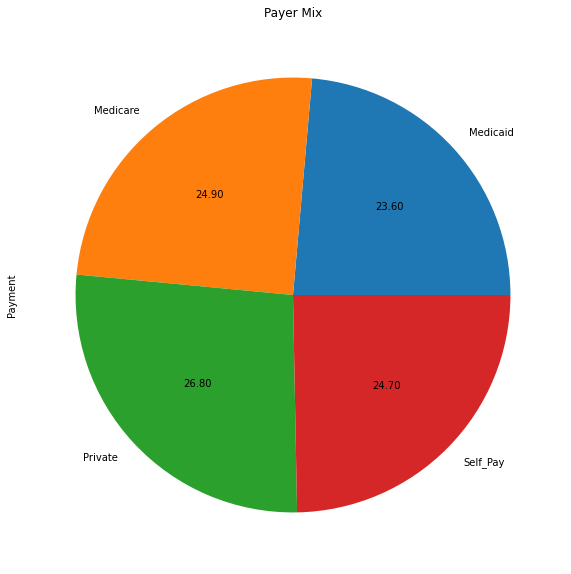

In [112]:
plot = grouped['Payment'].plot.pie(figsize=(10,10),autopct='%.2f',title="Payer Mix")

In [113]:
## all credit for styling goes to:https://towardsdatascience.com/make-your-pandas-dataframe-output-report-ready-a9440f6045c6

def highlight_number(row):
    return [
        'background-color: red; color: white' if cell <= 0 
        else 'background-color: green; color: white'
        for cell in row
    ]

grouped_profit.style \
  .apply(highlight_number) \
  .format('${0:,.2f}') \
  .set_caption('Revenues and P/L by Payer').set_table_styles([{
    'selector': 'caption',
    'props': [
        ('color', 'black'),
        ('font-size', '30px')
    ]
}]) \
  .set_properties(**{'padding':"40px", 'border':'2px solid white','font-size': '20pt'})

#grouped_profit.style.set_properties(**{ 'font-size': '20pt'})

,Payment,Gain/Loss
PayerType,,
Medicaid,$212.40,$-94.40
Medicare,$298.80,$-24.90
Private,$536.00,$187.60
Self_Pay,$123.50,$-197.60


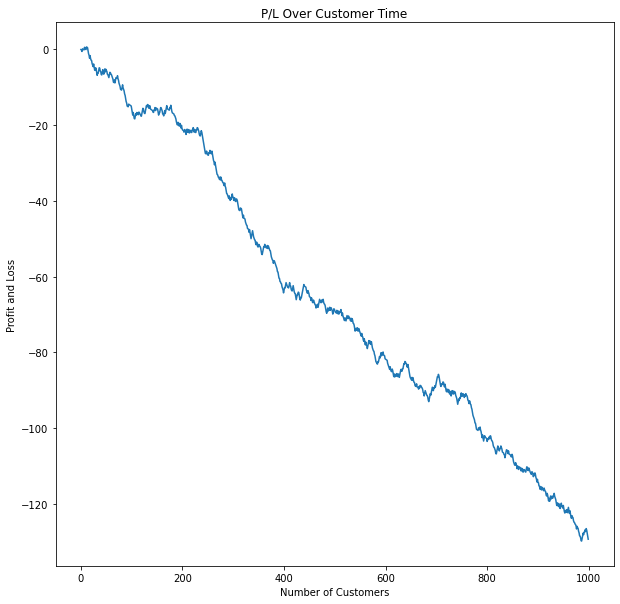

In [114]:
df['Gain/Loss'].cumsum().plot(ylabel="Profit and Loss",xlabel="Number of Customers", title="P/L Over Customer Time",figsize=(10, 10));

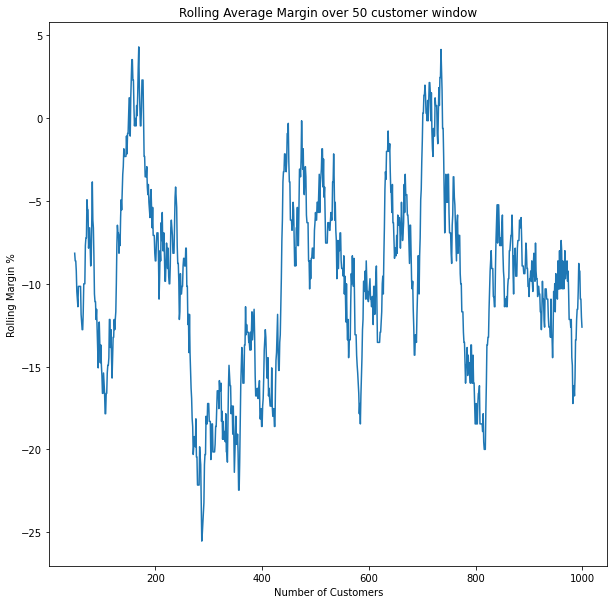

In [116]:
df['Margin'].rolling(50).mean().plot(ylabel="Rolling Margin %",xlabel="Number of Customers", 
                                     title="Rolling Average Margin over 50 customer window",figsize=(10,10)
                                   
                             
                                    );